# The other notebook was getting long

### I want to check if when I load a dataset, my transforms work

In [12]:
import torch
import torchvision.transforms as transforms
import torch.nn.functional as F
import video_dataset as Dataset
from torch.utils.data import DataLoader
torch.manual_seed(42)
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
transform = transforms.Compose([
  transforms.Lambda(lambda x: Dataset.correct_num_frames(x, target_length=64)),
  transforms.Lambda(lambda x: F.interpolate(x, size=(224, 224), mode='bilinear')),
  transforms.Lambda(lambda x: x / 255.0),  # Normalize to [0,1]
  transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #ImageNet
])
raw_path = '../data/WLASL2000'
train_path = './preprocessed_labels/asl100/train_instances_fixed_bboxes_short.json'
classes_path = './preprocessed_labels/asl100/train_classes.json'
train_set = Dataset.VideoDataset(
  raw_path,
  train_path,
  classes_path,
  transform=transform)
print(f"Length: {len(train_set)}")

Length: 1442


### only main process can use cuda, so we leave the device as cpu

In [14]:
train_loader = DataLoader(
  train_set,
  batch_size=1,
  shuffle=False, #random seed is set, so still reproucable
  num_workers=0)
train_loader

In [15]:
classes_list_path = './wlasl_class_list.txt'
with open(classes_list_path, "r") as f:
  classes = [line.strip().split()[1] for line in f]
print(classes[0])

book


In [16]:
frames1, label1 = next(iter(train_loader))
print(f"Shape of frames: {frames1.shape}")
print(f"Label shape: {label1.shape}")
  

Shape of frames: torch.Size([1, 64, 3, 224, 224])
Label shape: torch.Size([1])


In [17]:
print(f"Label: {classes[label1.item()]}")

Label: book


### So far so good, let's see if we can visualise the frames, to see if they are horrendous

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.1745684].


torch.Size([64, 3, 224, 224])


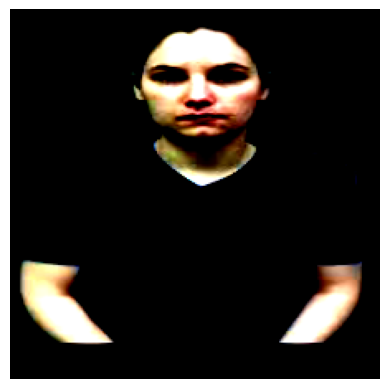

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.1896029].


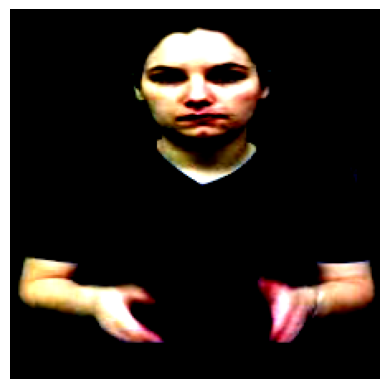

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.1827254].


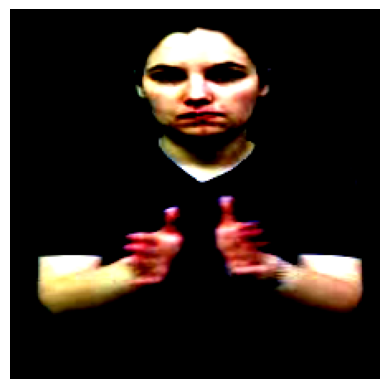

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5019624].


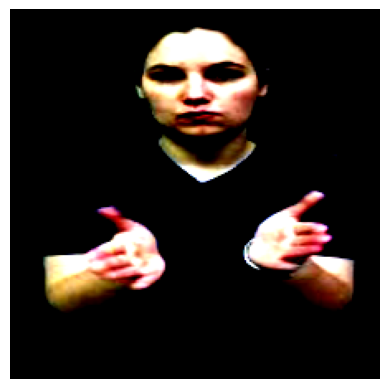

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.1752].


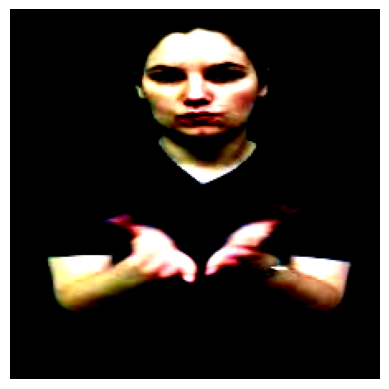

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.237996].


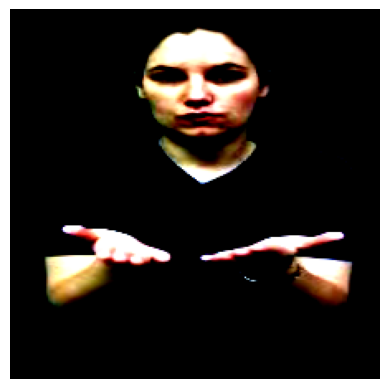

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.2030988].


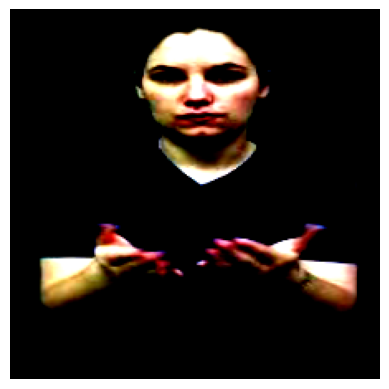

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.1846902].


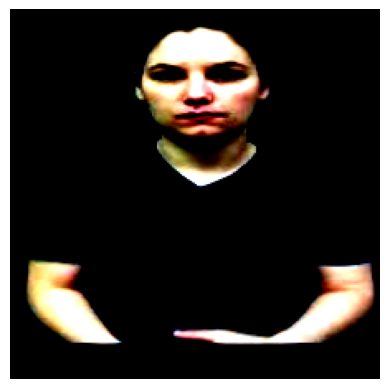

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.1849122].


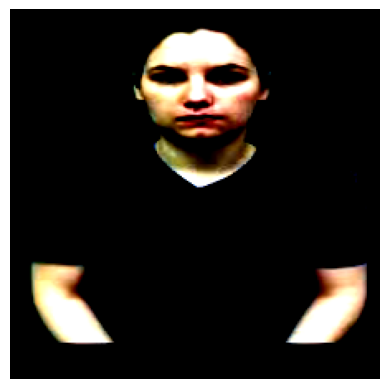

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.2221506].


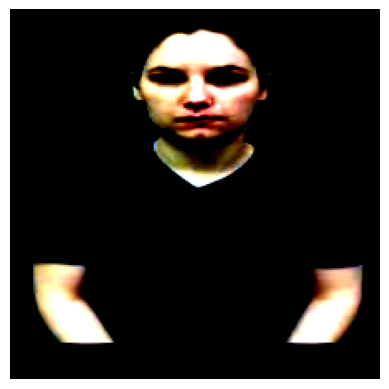

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.186279].


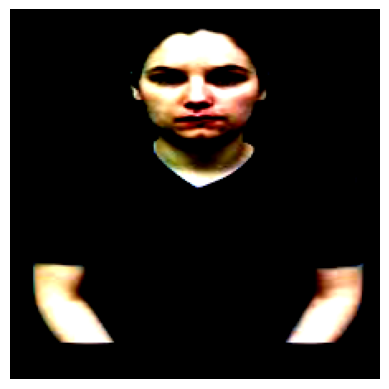

In [18]:
frames1 = frames1.squeeze()
print(frames1.shape)
Dataset.visualise_frames(frames1, 10)

### They do not look amazing, lets see what the original looked like though

In [ ]:
transform2 = transforms.Compose([
  transforms.Lambda(lambda x: Dataset.correct_num_frames(x, target_length=64)),
  transforms.Lambda(lambda x: x / 255.0),  # Normalize to [0,1
  transforms.Lambda(lambda x: F.interpolate(x, size=(224, 224), mode='bilinear')),
])
train_set2 = Dataset.VideoDataset(
  raw_path,
  train_path,
  classes_path,
  transform=transform2,
  crop=False,
)
print(f"length: {len(train_set2)}")

length: 1442


In [20]:
train_loader2 = DataLoader(
  train_set2,
  batch_size=1,
  shuffle=False,
  num_workers=1
)
train_loader2

In [21]:
frames1_2, label1_2 = next(iter(train_loader2))
print(f"Shape of frames: {frames1_2.shape}")
print(f"Label shape: {label1_2.shape}")

Shape of frames: torch.Size([1, 64, 3, 224, 224])
Label shape: torch.Size([1])


torch.Size([64, 3, 224, 224])


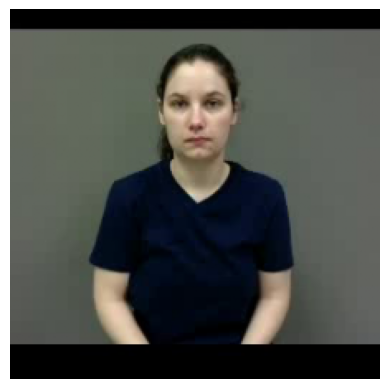

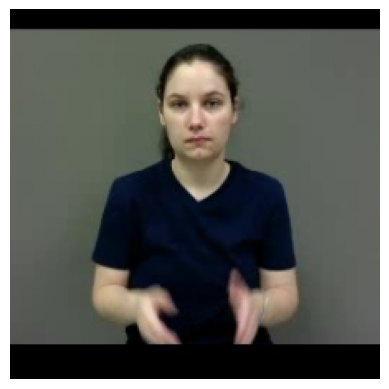

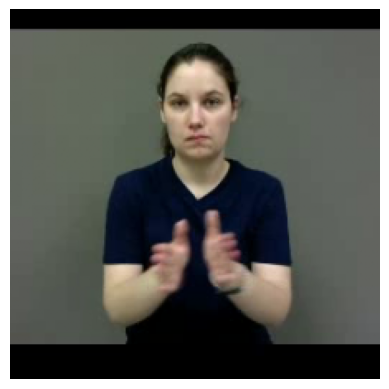

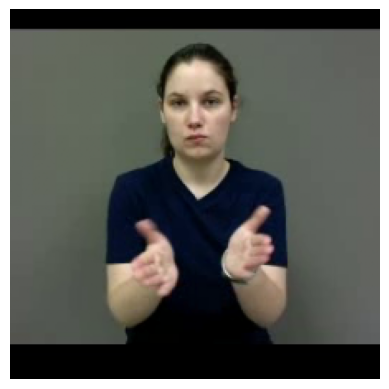

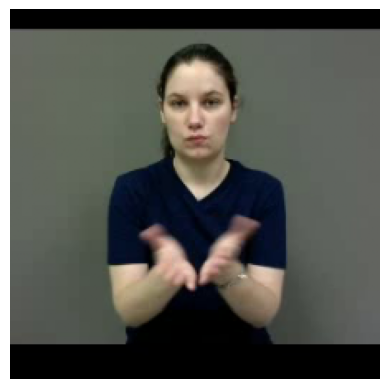

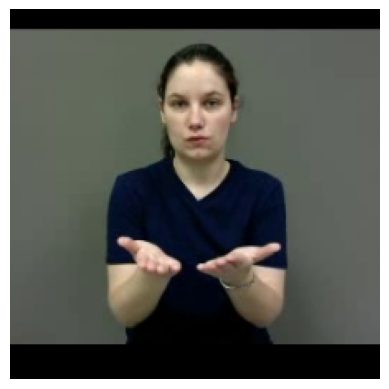

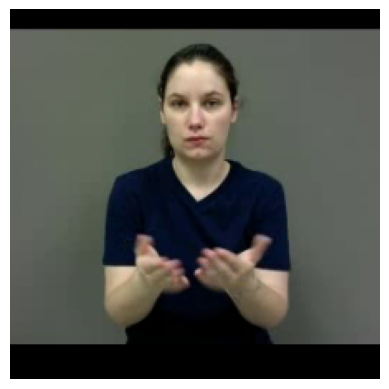

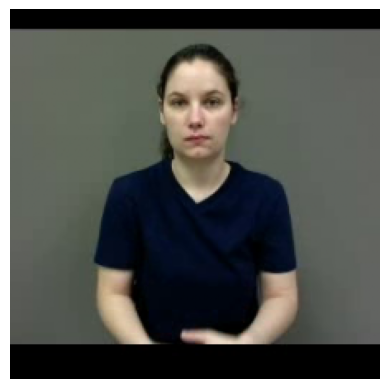

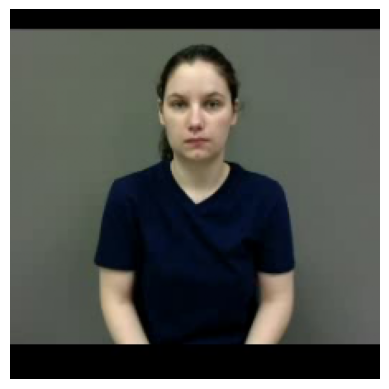

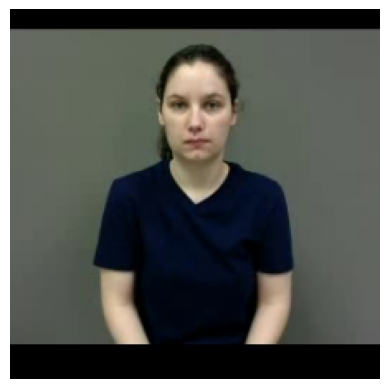

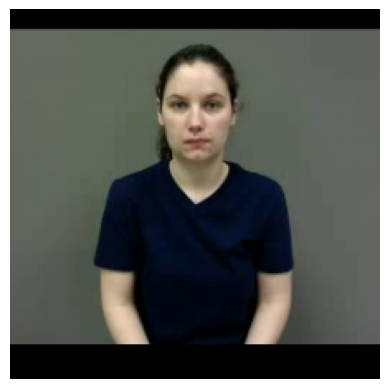

In [22]:
frames1_2 = frames1_2.squeeze()
print(frames1_2.shape)
Dataset.visualise_frames(frames1_2, 10)

In [ ]:
import json
import os
folder = './preprocessed_labels/asl100'
for file in os.listdir(folder):
  if '_classes' in file:
    full_path = os.path.join(folder,file)
    with open(full_path, 'r') as f:
      classes_mult = json.load(f)
    classes_idv = list(set(classes_mult))
    with open(full_path, 'w') as f:
      json.dump(classes_idv, f, indent=2)
    print(f"modified: {file}")

FileNotFoundError: [Errno 2] No such file or directory: 'test_classes.json'